In [13]:
%matplotlib inline

import matplotlib

In [1]:
from data_models.data_generators import npxg_for_against, get_latest_match_for_team_from_whoscored, get_match_for_team_from_whoscored_for_date, get_whoscored_position_df
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[logging.FileHandler("debug.log"), logging.StreamHandler()],
)


In [2]:
df=get_match_for_team_from_whoscored_for_date('chelsea', '2021-08-28')
df2 = get_whoscored_position_df()

2022-05-03 21:43:05,827 [INFO] Running query: "
SELECT main.x, main.y, main.endX, main.endY, main.player_name, main.event_type, main.outcomeType, main.team, main.opponent, main.match_date, main.is_home_team, main.satisfied_events,
legacy.shirt_number, legacy.pass_receiver_shirt_number, legacy.pass_receiver, legacy.position, legacy.team_score, legacy.opponent_score, legacy.formation
FROM whoscored AS main LEFT JOIN derived.whoscored_mclachbot_legacy_data AS legacy ON
 main.matchId = legacy.matchId AND
 main.id = legacy.id AND
 main.eventId = legacy.eventId
WHERE main.matchId IN (
  SELECT matchId FROM whoscored_meta WHERE match_date = '2021-08-28'
  AND (home='chelsea' or away='chelsea')
  ) and team = 'chelsea'
"
2022-05-03 21:43:06,221 [INFO] Running query: "SELECT * FROM whoscored_positions"


In [3]:
from visualizations.passmap import player_passing_maps

In [6]:
df.loc[df['player_name']=='mateo kovacic']['position']

355    Substitute
368    Substitute
371    Substitute
378    Substitute
379    Substitute
392    Substitute
412    Substitute
413    Substitute
414    Substitute
416    Substitute
418    Substitute
432    Substitute
433    Substitute
461    Substitute
462    Substitute
463    Substitute
471    Substitute
479    Substitute
511    Substitute
520    Substitute
546    Substitute
565    Substitute
571    Substitute
583    Substitute
625    Substitute
629    Substitute
632    Substitute
638    Substitute
646    Substitute
649    Substitute
650    Substitute
663    Substitute
665    Substitute
686    Substitute
690    Substitute
712    Substitute
715    Substitute
716    Substitute
Name: position, dtype: object

edouard mendy
reece james
marcos alonso
antonio rudiger
andreas christensen
cesar azpilicueta
ngolo kante
jorginho
romelu lukaku
kai havertz
mason mount
thiago silva
mateo kovacic
trevoh chalobah


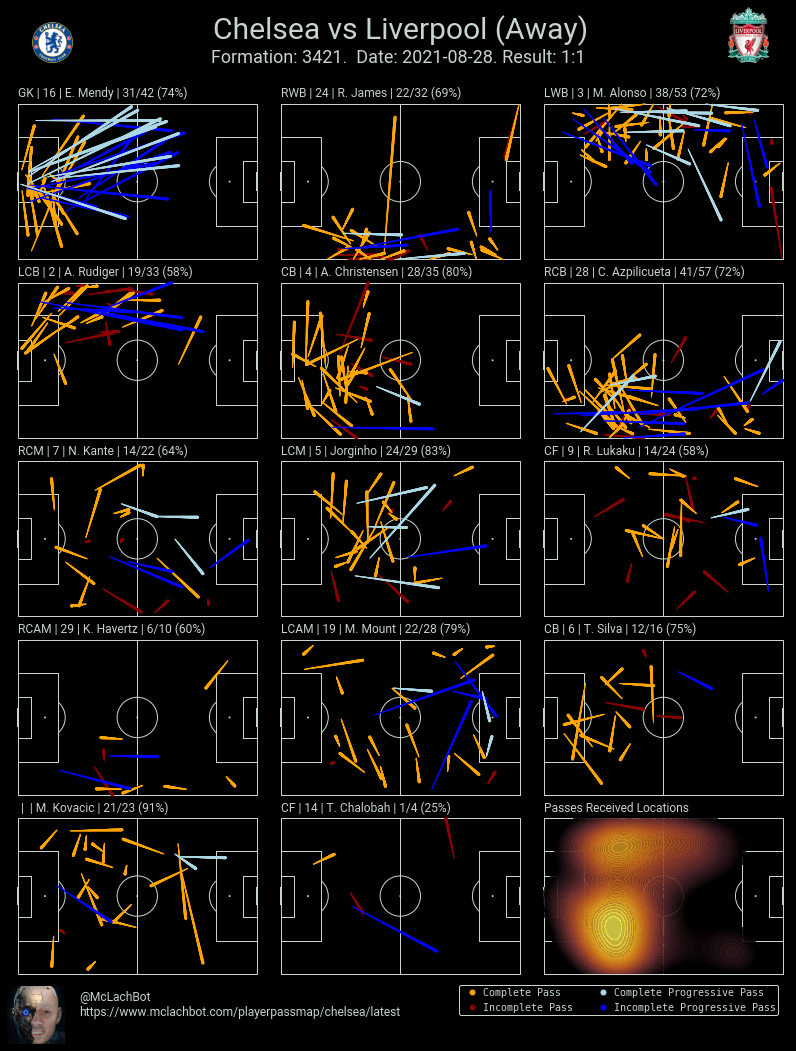

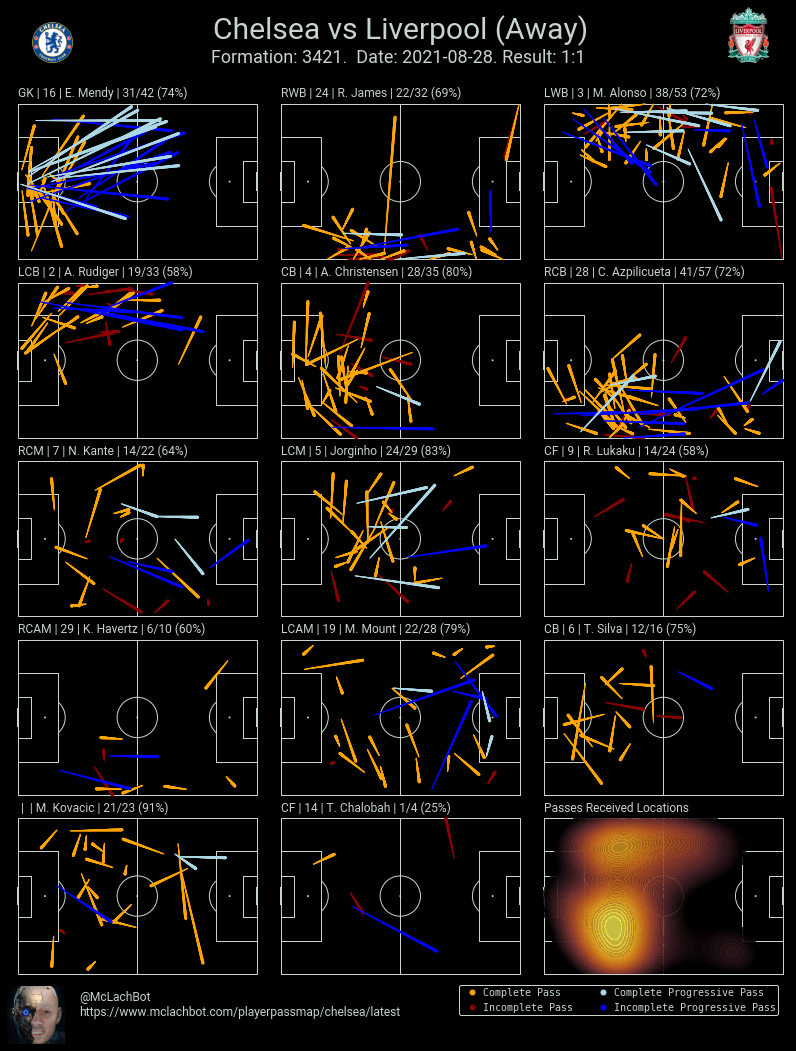

In [4]:
player_passing_maps(df,df2)

In [4]:
from visualizations.passmap import  plot_pass_map

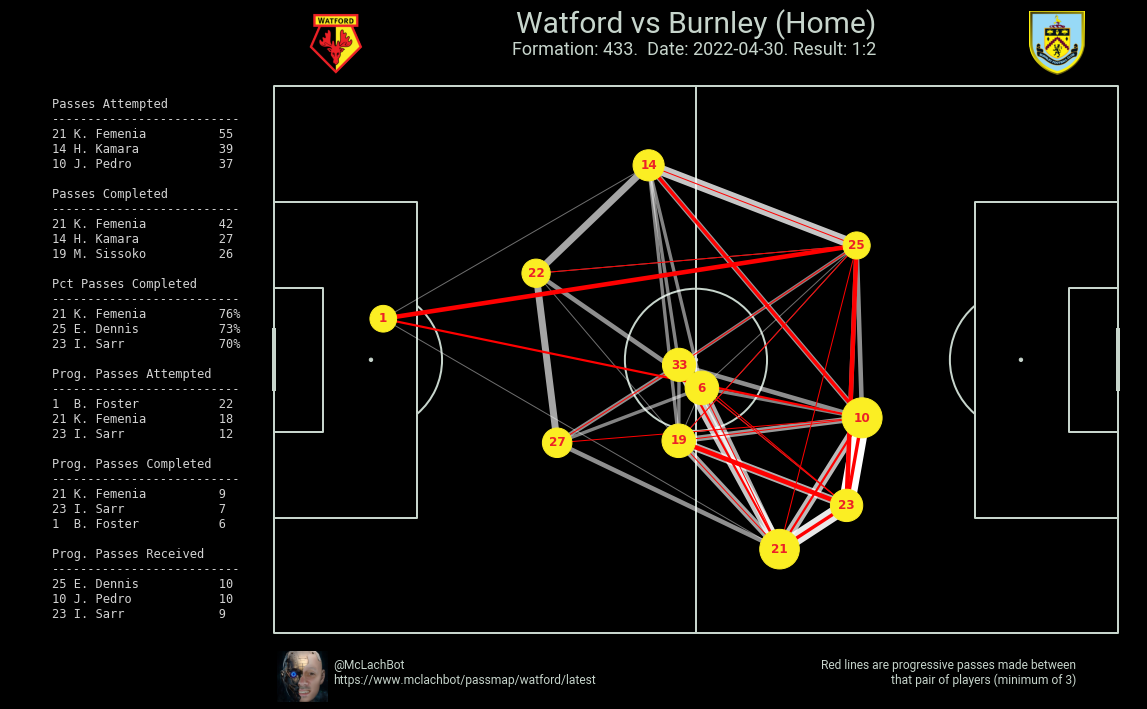

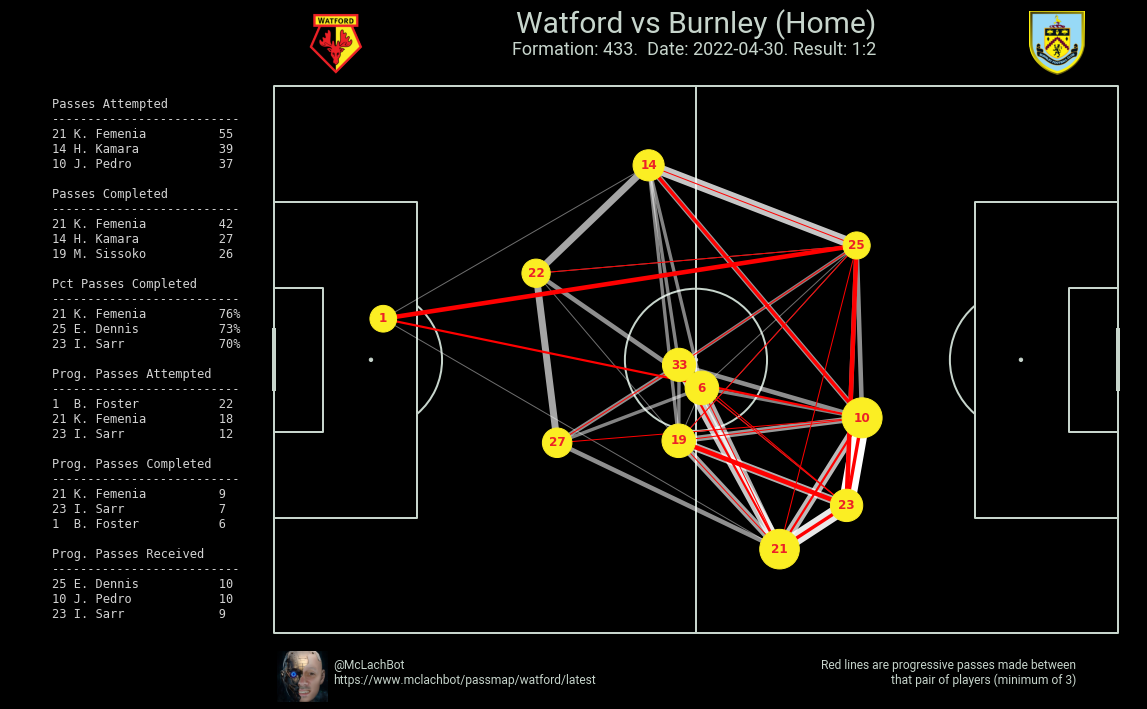

In [5]:
plot_pass_map(df)

In [30]:
data=npxg_for_against(team, season, rolling_window=5)

2022-03-25 23:08:48,604 [INFO] Running query: "SELECT `date`,`squad`,`opponent`,`npxg`,`player_id` FROM `fbref` WHERE `season`=2021 AND (`squad`='Chelsea' OR `opponent`='Chelsea')"


Error applying shot_pct to fbref data: 'shots_on_target'
Error applying xg_per_shot to fbref data: 'xg'
Error applying xg_outperform to fbref data: 'goals'
Error applying non_penalty_goals to fbref data: 'goals'
Error applying sca_live to fbref data: 'sca'
Error applying npxg_per_shot to fbref data: 'shots_total'
Error applying npxg_outperform to fbref data: 'non_penalty_goals'
Error applying npxg_outperform_per_shot to fbref data: 'npxg_outperform'
Error applying non_penalty_goals_per_shot to fbref data: 'non_penalty_goals'


In [26]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [32]:
data

,date,opponent,npxg,npxg_opp,round
4,2021-09-19,Tottenham,1.56,0.98,0
5,2021-09-25,Manchester City,1.48,1.28,1
6,2021-10-02,Southampton,1.66,1.34,2
7,2021-10-16,Brentford,1.56,1.22,3
8,2021-10-23,Norwich City,1.88,0.94,4
9,2021-10-30,Newcastle Utd,1.72,0.86,5
10,2021-11-06,Burnley,2.10,0.70,6
11,2021-11-20,Leicester City,1.80,0.68,7
12,2021-11-28,Manchester Utd,2.16,0.46,8
13,2021-12-01,Watford,1.88,0.62,9


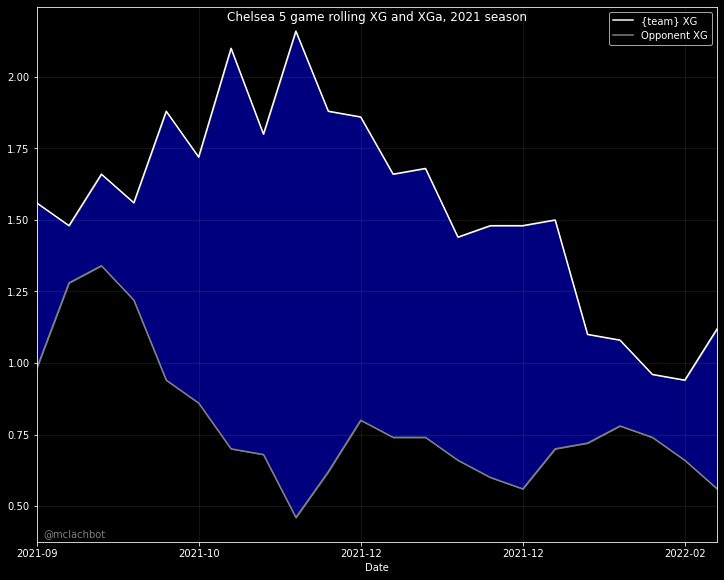

In [33]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
import numpy as np
from footmav import fb
import pandas as pd
fig = Figure(figsize=(10, 8))
#_ = FigureCanvasAgg(fig)
ax = fig.add_subplot(1, 1, 1)
 
pos = np.array(data[fb.NPXG.N].values>=data[fb.NPXG.N+"_opp"])
neg = np.array(data[fb.NPXG.N].values<data[fb.NPXG.N+"_opp"])
ax.fill_between(data['round'].values, data[fb.NPXG.N],y2= data[fb.NPXG.N+"_opp"],where=pos,color='blue',alpha=0.5,interpolate=True,  edgecolor='ivory')
ax.plot(data['round'].values, data[fb.NPXG.N], color='ivory', label='{team} XG')
ax.fill_between(data['round'].values, data[fb.NPXG.N],y2= data[fb.NPXG.N+"_opp"],where=neg,color='red',alpha=0.5,interpolate=True,  edgecolor='ivory')
ax.plot(data['round'].values, data[fb.NPXG.N+"_opp"], color='grey', label='Opponent XG')

ax.set_xlabel('Date')
ax.legend()
ax.set_title(f'{team} 5 game rolling XG and XGa, {season} season',  y=1.0, pad=-14)
#ax.set_xticks(XG_for_against_rolling['round'].values)
#ax.set_xticklabels(XG_for_against_rolling['opponent'].values, rotation=90)
title = f"xG overperformance, 5 Game Rolling Window"
#ax.set_ylim(0, 2.5)
ax.set_xlim(min(data['round'].values), max(data['round'].values))
ax.set_xticks(data['round'].values[0::5])
ax.set_xticklabels([pd.Timestamp(d).strftime("%Y-%m") for d in data['date'].values[0::5]])
#ax.set_ylim(-0.45, 0.5)
ax.text(0.01, 0.01, '@mclachbot', fontsize=10, transform=ax.transAxes, alpha=0.5)
ax.grid(alpha=0.1)
#plt.tight_layout(pad=0.5)
fig.tight_layout(pad=0.5)
fig